# Course Exam

### Imporing the relevant libraries

In [1]:
import pandas as pd
# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# We import the sine function which will help us generate our non-linear data
from math import sin

# Import the numpy library
import numpy as np

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

### Define the datasets

In [5]:
x_train, y_train =make_blobs(n_samples=500,n_features=2,random_state=365,centers=5,cluster_std=2)
x_test, y_test = make_blobs(n_samples=250,n_features=2,random_state=365,centers=5, cluster_std=2)

y_train

array([4, 2, 3, 4, 1, 1, 3, 1, 0, 3, 4, 0, 1, 2, 0, 4, 2, 1, 2, 4, 3, 3,
       4, 3, 3, 2, 0, 0, 3, 0, 4, 2, 3, 3, 4, 1, 2, 3, 4, 1, 1, 1, 3, 2,
       0, 3, 2, 1, 3, 4, 3, 0, 2, 3, 4, 1, 2, 2, 4, 1, 0, 3, 4, 1, 4, 4,
       0, 3, 4, 4, 1, 4, 3, 3, 2, 0, 2, 2, 4, 4, 2, 2, 4, 1, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 4, 0, 4, 0, 3,
       4, 4, 2, 2, 3, 4, 1, 4, 4, 0, 3, 3, 3, 1, 3, 2, 0, 1, 3, 4, 0, 0,
       4, 2, 0, 0, 3, 4, 2, 3, 2, 2, 2, 0, 1, 0, 2, 0, 4, 1, 3, 2, 2, 0,
       0, 0, 1, 4, 0, 4, 3, 4, 4, 2, 3, 3, 2, 3, 2, 4, 4, 3, 0, 0, 1, 3,
       4, 2, 1, 0, 1, 0, 3, 3, 2, 3, 3, 1, 1, 2, 4, 1, 4, 0, 0, 4, 0, 1,
       4, 4, 0, 0, 0, 3, 1, 0, 1, 2, 0, 1, 3, 2, 3, 2, 1, 2, 1, 2, 1, 0,
       2, 2, 3, 4, 1, 3, 4, 2, 0, 0, 0, 3, 1, 4, 4, 0, 0, 0, 1, 2, 3, 2,
       4, 1, 0, 2, 2, 1, 1, 3, 3, 2, 0, 0, 3, 4, 3, 1, 0, 4, 3, 3, 4, 1,
       4, 1, 0, 0, 2, 3, 1, 1, 2, 3, 1, 1, 4, 0, 2, 1, 4, 2, 0, 2, 0, 1,
       1, 0, 4, 4, 1, 3, 1, 1, 2, 1, 4, 4, 4, 3, 4,

In [6]:
data = pd.DataFrame(data = x_train, columns = ['Feature 1', 'Feature 2'])
data['Target'] = y_train
data

,Feature 1,Feature 2,Target
0,-3.424149,-6.043401,4
1,0.015117,-4.422058,2
2,4.537185,-3.252122,3
3,2.282136,-6.878540,4
4,6.430117,1.694177,1
...,...,...,...
495,5.827172,-2.160304,2
496,7.566561,3.320194,0
497,3.449585,-3.071168,3
498,-1.696145,-5.645474,4


# Creating a Jointplot for features

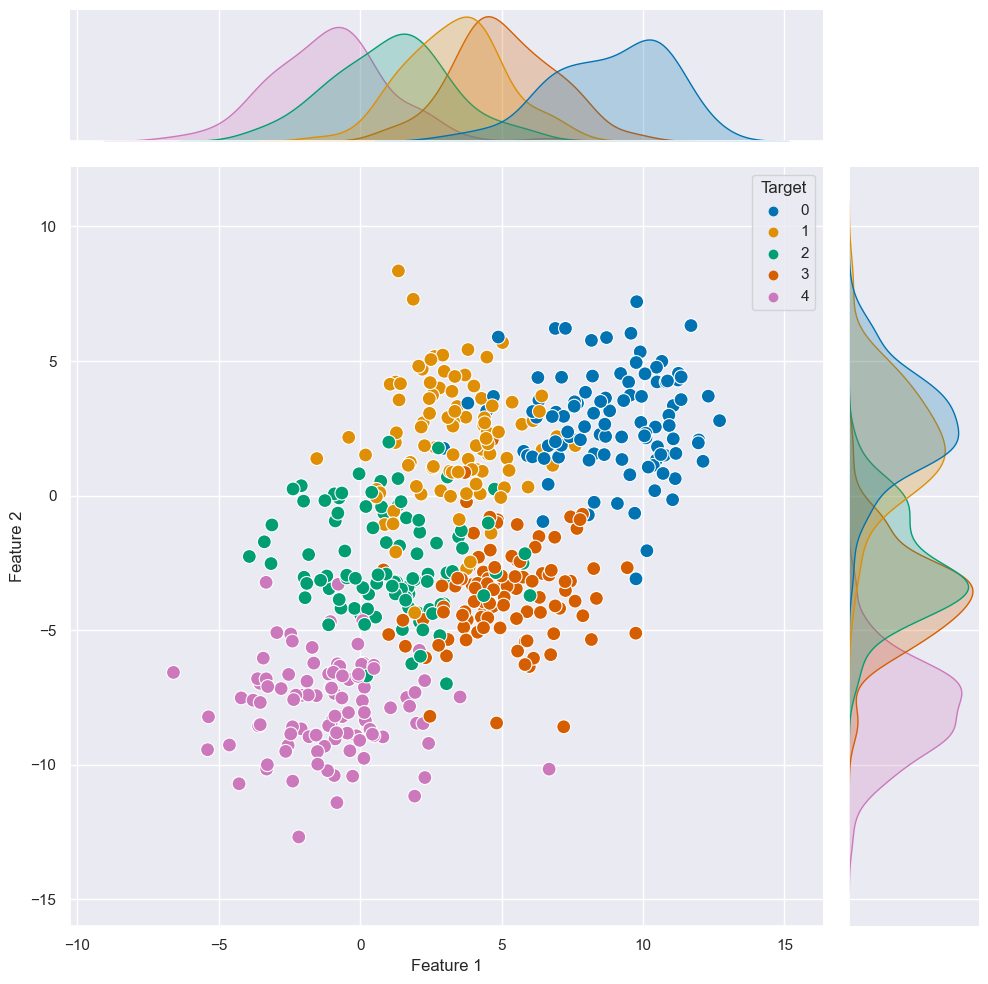

In [7]:
sns.set()

# Create a seaborn jointplot.
sns.jointplot(x = 'Feature 1', y = 'Feature 2', 
              data = data, 
              hue = 'Target', 
              palette = "colorblind",
              height = 10,
              s = 100, 
              legend = True);

# GridSearch for Best Params

In [20]:
parameters={"n_neighbors":range(1,11),"p":range(1,6),"weights":["uniform","distance"]}


In [21]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11), 'p': range(1, 6),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'n_neighbors': 10, 'p': 3, 'weights': 'uniform'}

# Modeling with and without the value of P

In [33]:
knn=KNeighborsClassifier(n_neighbors=10,weights="uniform")
knn=knn.fit(x_train,y_train)

In [35]:
y_test_pred=knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


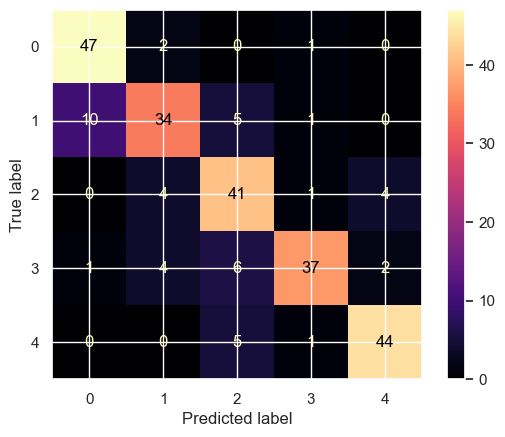

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=knn.classes_,cmap="magma")

In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        50
           1       0.77      0.68      0.72        50
           2       0.72      0.82      0.77        50
           3       0.90      0.74      0.81        50
           4       0.88      0.88      0.88        50

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250



In [24]:
knn=KNeighborsClassifier(n_neighbors=10,p=3,weights="uniform")
knn.fit(x_train,y_train
       )

KNeighborsClassifier(n_neighbors=10, p=3)

In [25]:
y_test_pred=knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


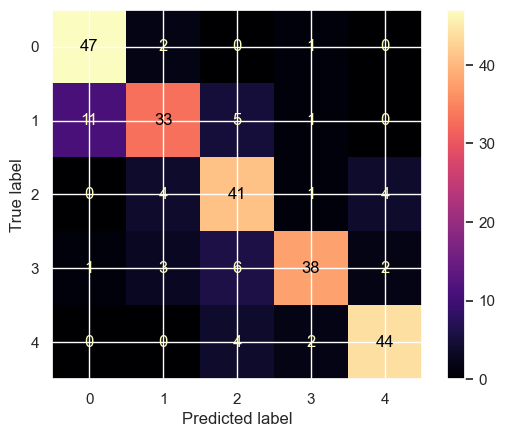

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=knn.classes_,cmap="magma")

In [29]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        50
           1       0.79      0.66      0.72        50
           2       0.73      0.82      0.77        50
           3       0.88      0.76      0.82        50
           4       0.88      0.88      0.88        50

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250

